# Optimizing Code using Vectorization

- Avoid loops (except for Gradient descent main loop)
- Use numpy functions to make algo faster

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
boston = load_boston()
x=boston.data
y=boston.target

#Normalizing Data
mean = np.mean(x,axis=0)
std = np.std(x,axis=0)
new_x = (x-mean)/std

#dummy feature
ones =np.ones((new_x.shape[0],1))
new_x=np.hstack((ones,new_x))

# Rewriting Functions

Function 1 - Hypothesis Function

- One can directly use dot product of x_data and theta to get all yhats

In [3]:
def hypothesis(x_data,theta):
    return np.dot(x_data,theta)

Fucntion 2 - Loss Function

In [4]:
def loss(x_data,y_data,theta):
    error=0.0
    yhat=hypothesis(x_data,theta)
    error=np.sum((y_data-yhat)**2)
    n=x_data.shape[0]
    return error/n

Function 3 - Gradient Function

In [5]:
def gradient(x_data,y_data,theta):
    yhat=hypothesis(x_data,theta)
    grad=np.dot(x_data.T,(yhat-y_data))
    n=x_data.shape[0]
    return grad/n

Function 4 - Gradient Descent

In [6]:
def grad_d(x_data,y_data,lr=0.1,max_epochs=300):
    n= x_data.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_epochs):
        e=loss(x_data,y_data,theta)
        error_list.append(e)      
        grad=gradient(x_data,y_data,theta)
        theta=theta-lr*grad
    return error_list,theta

# Testing the time and accuracy now

In [7]:
import time
start=time.time()

errors,final_theta=grad_d(new_x,y)

end=time.time()

print("Success!")
print("Time Taken:",end-start)

Success!
Time Taken: 0.00700831413269043


 - now time is very less!

In [8]:
final_theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

In [9]:
errors

[592.1469169960474,
 462.4604490684581,
 375.3852750957273,
 307.6933342962929,
 253.3916863467937,
 209.55988275906446,
 174.1302049153625,
 145.47824715741686,
 122.30009891984596,
 103.54456174692926,
 88.36328034470081,
 76.0713129155594,
 66.11549356461222,
 58.048967153583966,
 51.51067344934865,
 46.20881061552669,
 41.90750109402471,
 38.416036019468415,
 35.58019677482985,
 33.275250473323695,
 31.400294933308405,
 29.873691975646693,
 28.629378705367408,
 27.61388730734379,
 26.783936759906144,
 26.10448632753721,
 25.547161996504908,
 25.08898417710861,
 24.71133882441255,
 24.399145276935652,
 24.140183102536817,
 23.924547492728305,
 23.744208598563592,
 23.59265492471798,
 23.46460471201707,
 23.355772318479683,
 23.262679096703383,
 23.182500275377258,
 23.112940976950796,
 23.05213581628629,
 22.998567586378826,
 22.951001395282688,
 22.9084313122499,
 22.87003714226488,
 22.83514940208474,
 22.80322093811317,
 22.773803923546087,
 22.74653121264121,
 22.721101224522535

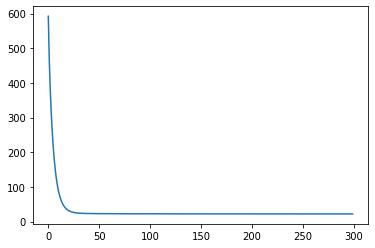

In [10]:
plt.plot(errors)

In [11]:
ypred=hypothesis(new_x,final_theta)

In [12]:
def r2_score(yo,yp):
    num=np.sum((yo-yp)**2)
    denom=np.sum((yo-yo.mean())**2)
    score=1-(num/denom)
    return score*100

In [13]:
r2_score(y,ypred)

74.04541323942743

In [14]:
# Same Accuracy but Faster!